In [1]:
from similarNumbers import App

# Create the app and train the SVM
pred = App(mnist_path="./uncompressed_data")
pred.trainSVM()

# There's no need to run this part of the code every time, it's very time consuming.

Training SVM...
Fitting PCA...
Reducing dimensionality...
Done! New Shape: (60000, 87)
Training SVM...
Done! Time: 67.45s


In [2]:
# Compute the accuracy of the SVM
pred.test_accuracy() # This only uses test images that have not been shown to the SVM.

Computing accuracy on test images...
Predicting test images...
Done! Accuracy: 98.44%, Time: 44.73s


0.9844

Prediction: [8] with confidence 9.31


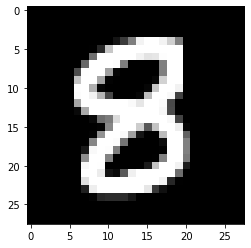

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import center_of_mass
import cv2

# A simple test using an image drawn by me on paint (a number 8)
# The image can be changed by swapping "Test.png" with your own image (careful, it must be small,
# otherwise cv2.resize will give weird results).

# Load the image
img = (1-plt.imread("Test.png")[:, :, 0])*255

# Resize the image
img = cv2.resize(img, (28, 28))

# Compute the center of mass
center = center_of_mass(img)

# Roll the image
img = np.roll(img, -int(center[0]-14), axis=0)
img = np.roll(img, -int(center[1]-14), axis=1)

plt.imshow(img, cmap="gray")

# Predict the number
prediction, confidence = pred.predict(img)
print(f"Prediction: {prediction} with confidence {confidence:.2f}")
# Note that confidence is not a percentage, but a distance to the decision boundary.